In [206]:
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load the data

### 1a. Explore the file structure of CSV file

In [47]:
dxcm = pd.read_csv("D:\OneDrive - FSV\IES bc\Data Proccesing in Python\Midterm\DXCM.csv")
dxcm['Date'] = pd.to_datetime(dxcm['Date'])
dxcm = dxcm.set_index('Date')
dxcm.dtypes
dxcm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-13,12.9775,12.5225,12.5825,12.8875,4707200,12.8875
2017-11-14,13.1100,12.6375,12.8900,12.8875,7096400,12.8875
2017-11-15,13.1475,12.7850,12.8425,13.0000,5410800,13.0000
2017-11-16,13.2900,12.8675,13.0625,13.2550,3868000,13.2550
2017-11-17,13.5225,13.0500,13.2400,13.5025,6152800,13.5025


### 1b. Explore the structure of one CSV

In [44]:
trgp = pd.read_csv("D:\OneDrive - FSV\IES bc\Data Proccesing in Python\Midterm\TRGP.csv")
trgp['Date'] = pd.to_datetime(trgp['Date'])
trgp = trgp.set_index('Date')
trgp.dtypes
trgp.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-13,44.080002,42.139999,44.080002,42.290001,1461000.0,33.785347
2017-11-14,42.450001,41.500000,42.130001,41.560001,1636200.0,33.202152
2017-11-15,42.759998,40.570000,41.290001,42.320000,1865000.0,33.809315
2017-11-16,43.150002,41.410000,43.150002,41.900002,1362900.0,33.473782
2017-11-17,42.490002,41.639999,42.220001,42.040001,999000.0,33.585617


### 1c. Try another one

In [163]:
tsn = pd.read_csv("D:\OneDrive - FSV\IES bc\Data Proccesing in Python\Midterm\TSN.csv")
tsn['Date'] = pd.to_datetime(tsn['Date'])
tsn = tsn.set_index('Date')
print(tsn.dtypes)
tsn.head()


High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-13,75.830002,73.180000,74.559998,75.589996,5475300.0,68.071846
2017-11-14,76.620003,75.610001,75.650002,76.070000,2867200.0,68.504120
2017-11-15,76.940002,75.750000,76.320000,76.209999,3170300.0,68.630180
2017-11-16,77.739998,75.910004,76.529999,77.260002,2567600.0,69.575752
2017-11-17,78.029999,76.750000,76.830002,77.970001,2258600.0,70.215149


### 1d. Load all files into a single df
* Remember keeping track of the analyzed company!
* Beware dtypes!
* What should be the index?

In [164]:
data = pd.concat([dxcm,trgp,tsn], keys=['DXCM','TRGP','TSN'], names=['Company'])
data

High        Low       Open      Close     Volume  \
Company Date                                                                
DXCM    2017-11-13  12.977500  12.522500  12.582500  12.887500  4707200.0   
        2017-11-14  13.110000  12.637500  12.890000  12.887500  7096400.0   
        2017-11-15  13.147500  12.785000  12.842500  13.000000  5410800.0   
        2017-11-16  13.290000  12.867500  13.062500  13.255000  3868000.0   
        2017-11-17  13.522500  13.050000  13.240000  13.502500  6152800.0   
...                       ...        ...        ...        ...        ...   
TSN     2022-11-07  68.019997  66.029999  67.480003  67.260002  4330600.0   
        2022-11-08  68.669998  67.070000  67.309998  67.730003  2103700.0   
        2022-11-09  66.110001  63.619999  65.519997  64.110001  5160700.0   
        2022-11-10  66.879997  65.290001  65.610001  66.459999  4080200.0   
        2022-11-11  67.519997  65.580002  66.559998  67.410004  4794100.0   

                    Adj Close  
Company Date                   
DXCM    2017-11-13  12.887500  
        2017-11-14  12.887500  
        2017-11-15  13.000000  
        2017-11-16  13.255000  
        2017-11-17  13.502500  
...                       ...  
TSN     2022-11-07  67.260002  
        2022-11-08  67.730003  
        2022-11-09  64.110001  
        2022-11-10  66.459999  
        2022-11-11  67.410004  

[3776 rows x 6 columns]

### Tasks 
#### 1. Is there a company that has no difference between the Close and Adj Close columns?

In [165]:
data['Close_diff'] = (data['Close'] - data['Adj Close']).round(decimals=4)
data
pd.DataFrame(data.groupby("Company")['Close_diff'].apply(lambda x: (x != 0).any()))

,Close_diff
Company,
DXCM,False
TRGP,True
TSN,True


#### 2. What is the highest and lowest price (Adj Close) each company recorded?

In [166]:
pd.DataFrame(data.groupby('Company')['Adj Close'].agg(['max', 'min']))

,max,min
Company,,
DXCM,162.815002,12.887500
TRGP,80.629997,4.560299
TSN,98.601814,42.083450


#### Calculate logarithmic returns from Adj Close. For each company report on its, min, man, mean, median of the return distribution

In [167]:
data['Log_diff'] = data.groupby('Company')['Adj Close'].apply(lambda x: pd.Series(x/x.shift(1))).apply(lambda x: np.log(x))
data.groupby('Company')['Log_diff'].agg(['min','max','mean','median'])

C:\Users\svobo\AppData\Local\Temp\ipykernel_18664\4204314931.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data['Log_diff'] = data.groupby('Company')['Adj Close'].apply(lambda x: pd.Series(x/x.shift(1))).apply(lambda x: np.log(x))


,min,max,mean,median
Company,,,,
DXCM,-0.187498,0.267333,0.001746,0.002127
TRGP,-0.753054,0.300809,0.000609,0.001832
TSN,-0.153231,0.204593,-0.000008,0.000148


#### When did each company record the highest gain and highest loss for the day?

In [168]:
data.groupby('Company')['Log_diff'].agg(['idxmax','idxmin']).rename(columns={'idxmax':'Max return','idxmin':'Min return'})

,Max return,Min return
Company,,
DXCM,"(DXCM, 2018-08-02 00:00:00)","(DXCM, 2020-03-16 00:00:00)"
TRGP,"(TRGP, 2020-03-19 00:00:00)","(TRGP, 2020-03-09 00:00:00)"
TSN,"(TSN, 2020-03-19 00:00:00)","(TSN, 2020-03-16 00:00:00)"


#### What is the average calendar weekly volume for each company?

In [192]:
data.groupby(['Company',pd.Grouper(level='Date',freq='W')])['Volume'].mean()

Company  Date      
DXCM     2017-11-19     5447040.0
         2017-11-26     4851100.0
         2017-12-03    11231040.0
         2017-12-10     5642480.0
         2017-12-17     5713120.0
                          ...    
TSN      2022-10-16     2373480.0
         2022-10-23     2224520.0
         2022-10-30     2715540.0
         2022-11-06     1940000.0
         2022-11-13     4093860.0
Name: Volume, Length: 783, dtype: float64

#### Which company recorded the highest total return over the whole period?

In [204]:
data.groupby('Company')['Adj Close'].agg(lambda x: x.iloc[-1] - x.iloc[0])

Company
DXCM    103.072499
TRGP     38.854652
TSN      -0.661842
Name: Adj Close, dtype: float64

#### Plot log-returns

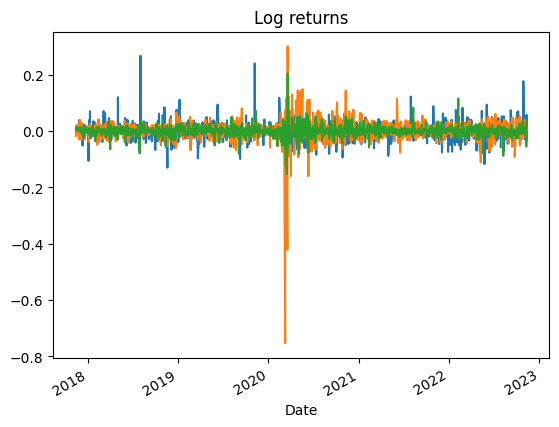

In [219]:
companies = ['DXCM','TRGP','TSN']

for company in companies:
    graph = data.loc[company,'Log_diff'].plot()
    graph.set_title('Log returns')

#### Plot distribution

### Task 3

#### Find out how many companies do not filled-in the date of inclusion (column “included”) to S&P 500

#### Calculate which company is the oldest/youngest constituent and tell us the average age of a constituent in the sample.

#### Describe the distribution of companies across sectors

#### Parse the “hq” column, extract the state of the hq and describe the distribution of the states

#### Report on distribution of subindustries for the “Consumer Discretionary” GICS sector.